In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dfs = [train, test]

train.name = 'Training Set'
test.name = 'Test Set'

In [3]:
def divide_data(data_all):
    return data_all.loc[:1459], data_all.loc[1460:].drop(['SalePrice'], axis=1)

def concat_data(train, test):
    return pd.concat([train, test], sort=True).reset_index(drop=True)

data_all = concat_data(train, test)

In [4]:
print(train.shape)

(1460, 81)


In [5]:
print('Number of training examples = {}' .format(train.shape[0]))
print('Number of training columns = {}' .format(train.shape[1]))
print('Number of test examples = {}' .format(test.shape[0]))
print('Number of test columns = {}' .format(test.shape[1]))

Number of training examples = 1460
Number of training columns = 81
Number of test examples = 1459
Number of test columns = 80


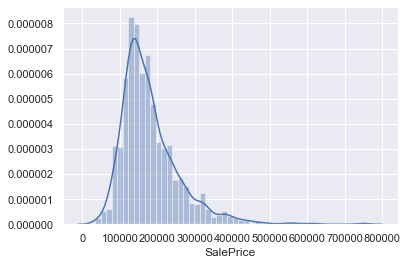

In [6]:
sns.distplot(train['SalePrice'])

In [7]:
print('Skewness: %f' % train['SalePrice'].skew())
print('Skewness: {}' .format(train['SalePrice'].skew()))

Skewness: 1.882876
Skewness: 1.8828757597682129


In [8]:
print('Kurtosis: %f' % train['SalePrice'].kurt())

Kurtosis: 6.536282


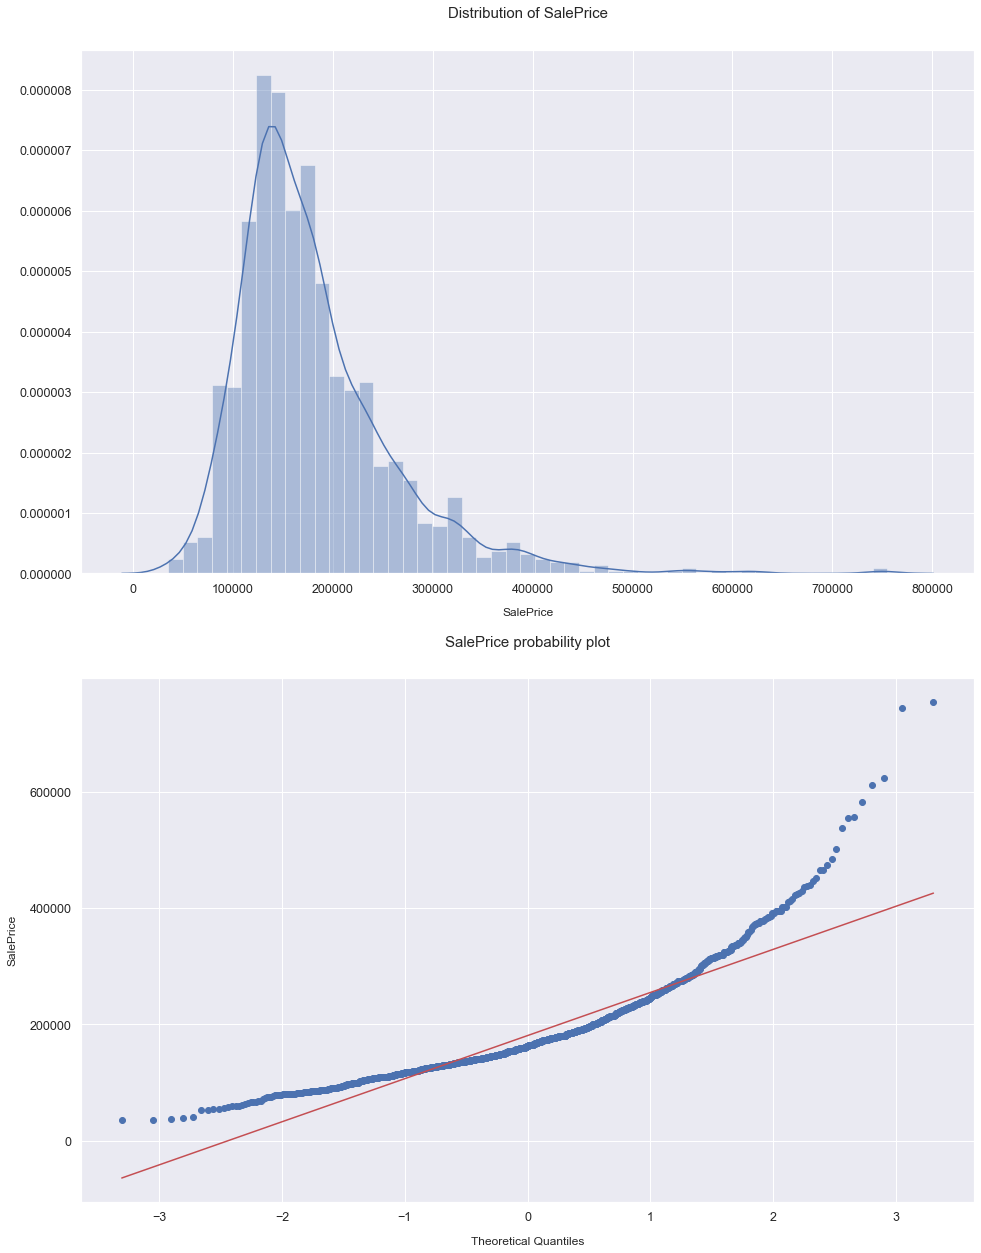

In [9]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(train['SalePrice'], hist=True, ax=axs[0])
probplot(train['SalePrice'], plot=axs[1])

axs[0].set_xlabel('SalePrice', size=12, labelpad=12.5)
axs[1].set_xlabel('Theoretical Quantiles', size=12, labelpad=12.5)
axs[1].set_ylabel('SalePrice', size=12, labelpad=12.5)

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=12.5)
    axs[i].tick_params(axis='y', labelsize=12.5)
    
axs[0].set_title('Distribution of SalePrice', size=15, y=1.05)
axs[1].set_title('SalePrice probability plot', size=15, y=1.05)

plt.show()

In [10]:

def count_missing(df):
    count = 0
    for col in df.columns.tolist():
        if df[col].isnull().sum():
            count += 1
            print('Missing data in column {} of {}/{}'.format(col, df[col].isnull().sum(), len(df)))
    print('Total number of columns with missing data: {}'.format(count))
    print('\n')
    
for i in dfs:
    print(' {} '.format(i.name))
    count_missing(i)

 Training Set 
Missing data in column LotFrontage of 259/1460
Missing data in column Alley of 1369/1460
Missing data in column MasVnrType of 8/1460
Missing data in column MasVnrArea of 8/1460
Missing data in column BsmtQual of 37/1460
Missing data in column BsmtCond of 37/1460
Missing data in column BsmtExposure of 38/1460
Missing data in column BsmtFinType1 of 37/1460
Missing data in column BsmtFinType2 of 38/1460
Missing data in column Electrical of 1/1460
Missing data in column FireplaceQu of 690/1460
Missing data in column GarageType of 81/1460
Missing data in column GarageYrBlt of 81/1460
Missing data in column GarageFinish of 81/1460
Missing data in column GarageQual of 81/1460
Missing data in column GarageCond of 81/1460
Missing data in column PoolQC of 1453/1460
Missing data in column Fence of 1179/1460
Missing data in column MiscFeature of 1406/1460
Total number of columns with missing data: 19


 Test Set 
Missing data in column MSZoning of 4/1459
Missing data in column LotFr

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64


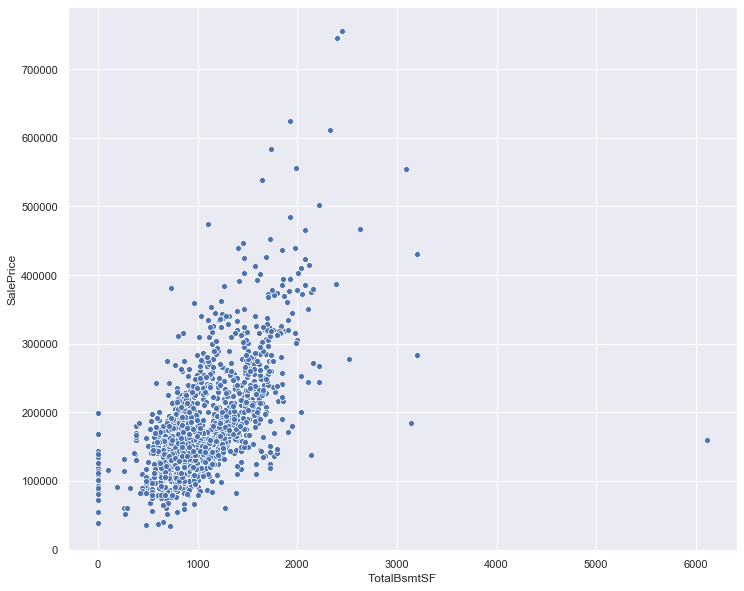

In [11]:
print(train['TotalBsmtSF'].value_counts())
fig, axs = plt.subplots(figsize=(12,10))
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.scatterplot(x=var, y='SalePrice', data=data)
plt.show()

In [12]:
# Filling in the Missing bits

# MasVnrType/Area
data_all['MasVnrType'] = data_all['MasVnrType'].fillna('None')
data_all['MasVnrArea'] = data_all['MasVnrArea'].fillna(0)

# Bsmt related Na's filled
for feature in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    data_all[feature] = data_all[feature].fillna('None')

for feature in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    data_all[feature] = data_all[feature].fillna(0)

# Garage Related Na's filled 
for feature in ['GarageCars', 'GarageArea', 'GarageYrBlt']:
    data_all[feature] = data_all[feature].fillna(0)

for feature in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data_all[feature] = data_all[feature].fillna('None')
    
# Rest of the categorical types Na's filled
for feature in ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu']:
    data_all[feature] = data_all[feature].fillna('None')

In [13]:
count_missing(data_all)

Missing data in column Electrical of 1/2919
Missing data in column Exterior1st of 1/2919
Missing data in column Exterior2nd of 1/2919
Missing data in column Functional of 2/2919
Missing data in column KitchenQual of 1/2919
Missing data in column LotFrontage of 486/2919
Missing data in column MSZoning of 4/2919
Missing data in column SalePrice of 1459/2919
Missing data in column SaleType of 1/2919
Missing data in column Utilities of 2/2919
Total number of columns with missing data: 10




In [14]:
# Fill the rest of the above missing values

for feature in ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']:
    data_all[feature] = data_all.groupby(['MSSubClass', 'Neighborhood'])[feature].apply(lambda x: x.fillna(x.mode()[0]))

In [15]:
data_all['LotFrontage'] = data_all.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [16]:
count_missing(data_all)

Missing data in column SalePrice of 1459/2919
Total number of columns with missing data: 1




In [17]:
def change_val(df):
    for i in range(len(df)):
        if df[i] == 0:
            df[i] = df.groupby(['Neighborhood'])[i].apply(lambda x: x.median())
    return df

change_val(data_all['LotFrontage'])

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [18]:
count_missing(data_all)

Missing data in column SalePrice of 1459/2919
Total number of columns with missing data: 1




In [19]:
print('Skewedness: {}' .format(train['SalePrice'].skew()))
print('Kurtosis: {}' .format(train['SalePrice'].kurt()))
print('Mean: {}' .format(train['SalePrice'].mean()))
print('Median: {}' .format(train['SalePrice'].median()))
print('Max: {}' .format(train['SalePrice'].max()))

Skewedness: 1.8828757597682129
Kurtosis: 6.536281860064529
Mean: 180921.19589041095
Median: 163000.0
Max: 755000


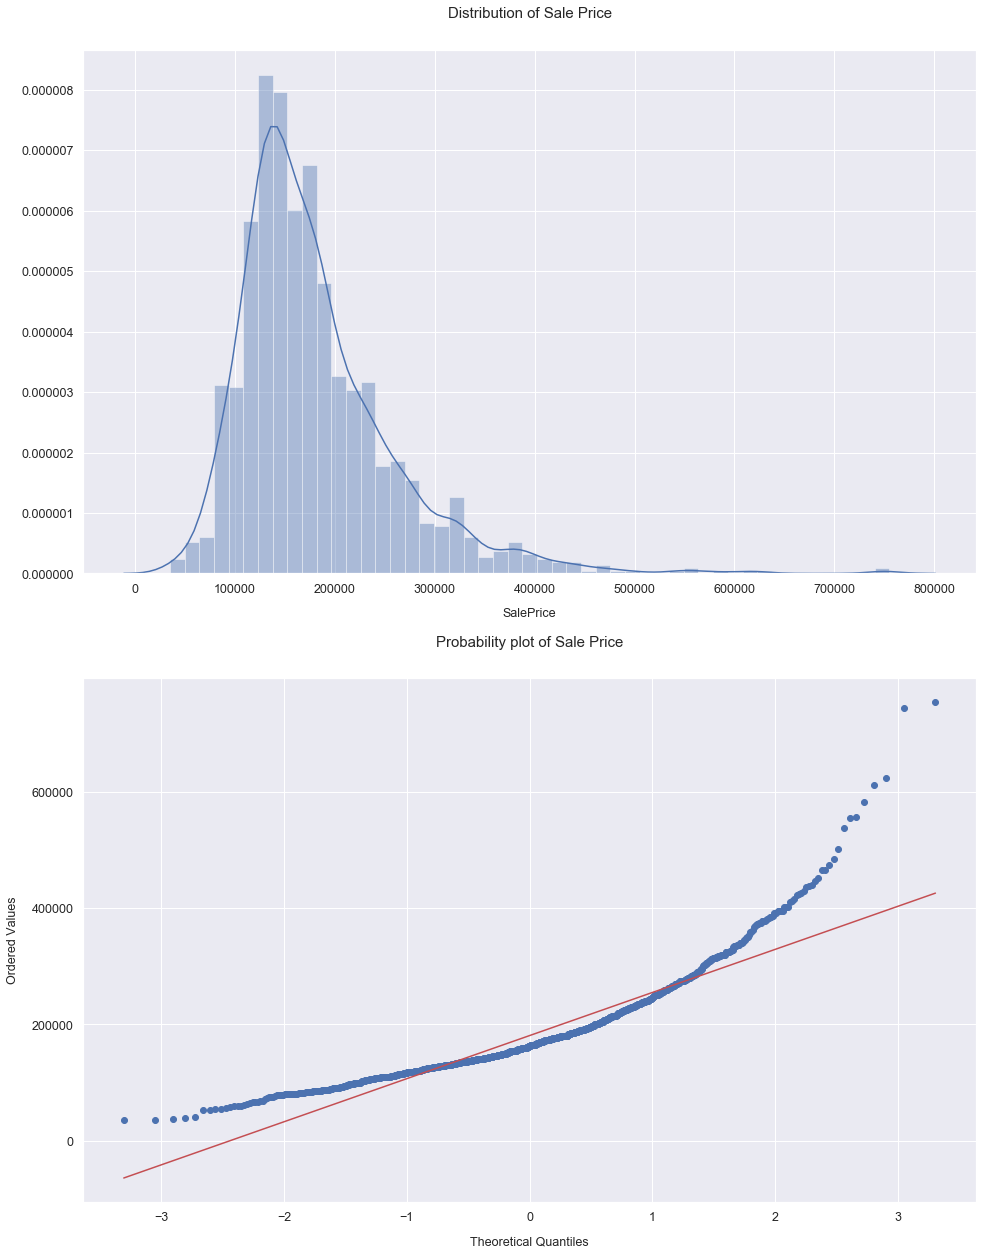

In [20]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(train['SalePrice'], hist=True, ax=axs[0])
probplot(train['SalePrice'], plot=axs[1])

axs[0].set_xlabel('SalePrice', size=12.5, labelpad=12.5)
axs[1].set_ylabel('Ordered Values', size=12.5, labelpad=12.5)
axs[1].set_xlabel('Theoretical Quantiles', size=12.5, labelpad=12.5)

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=12.5)
    axs[i].tick_params(axis='y', labelsize=12.5)

axs[0].set_title('Distribution of Sale Price', size=15, y=1.05)
axs[1].set_title('Probability plot of Sale Price', size=15, y=1.05)

plt.show()

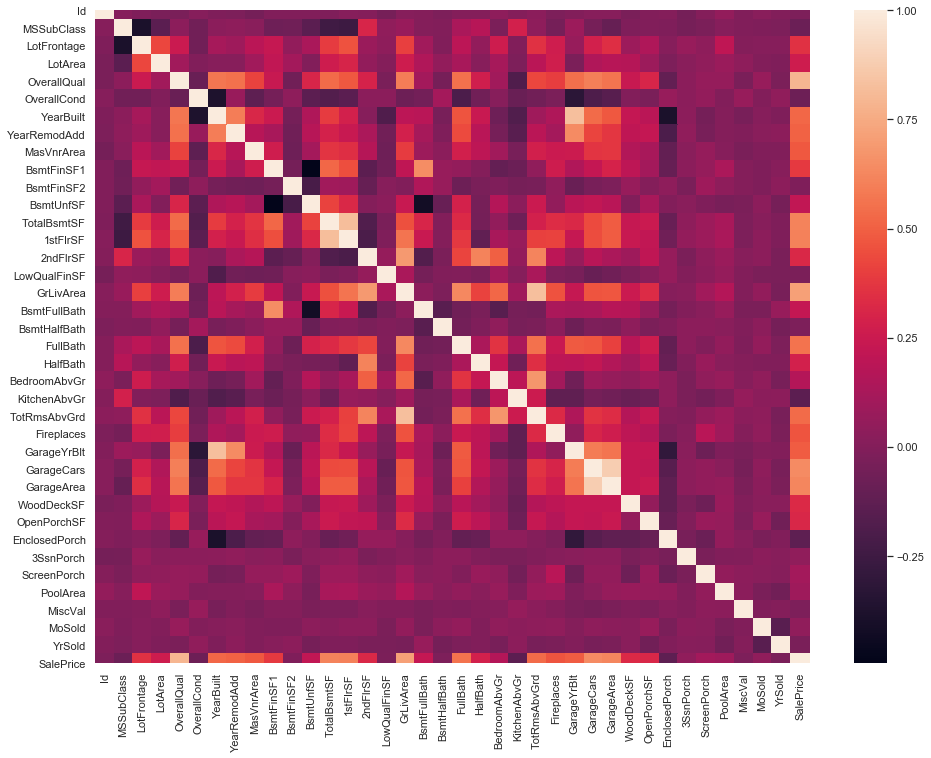

In [21]:
fig, ax = plt.subplots(figsize=(16, 12))

train_cor = train.corr()
sns.heatmap(train_cor)

In [22]:

train, test = divide_data(data_all)

# Finding the correlation relationship between 'SalePrice' and other variables

train_cor = train.corr() # Correlation matrix
new_cols = train_cor.abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
new_cols.rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation Coefficient'}, inplace=True)
new_cols.drop(new_cols[new_cols['Correlation Coefficient'] == 1.0].index)
# print(new_cols[new_cols['Correlation Coefficient']==1.0].index)
new_cols[new_cols['Feature1'] == 'SalePrice'].drop(12)

Feature1       Feature2  Correlation Coefficient
44    SalePrice    OverallQual                 0.790982
46    SalePrice      GrLivArea                 0.708624
54    SalePrice     GarageCars                 0.640409
58    SalePrice     GarageArea                 0.623431
63    SalePrice    TotalBsmtSF                 0.613581
66    SalePrice       1stFlrSF                 0.605852
84    SalePrice       FullBath                 0.560664
97    SalePrice   TotRmsAbvGrd                 0.533723
99    SalePrice      YearBuilt                 0.522897
105   SalePrice   YearRemodAdd                 0.507101
118   SalePrice     MasVnrArea                 0.472614
129   SalePrice     Fireplaces                 0.466929
173   SalePrice     BsmtFinSF1                 0.386420
196   SalePrice    LotFrontage                 0.347806
217   SalePrice     WoodDeckSF                 0.324413
221   SalePrice       2ndFlrSF                 0.319334
224   SalePrice    OpenPorchSF                 0.315856
254   SalePrice       HalfBath                 0.284108
275   SalePrice        LotArea                 0.263843
279   SalePrice    GarageYrBlt                 0.261366
334   SalePrice   BsmtFullBath                 0.227122
350   SalePrice      BsmtUnfSF                 0.214479
453   SalePrice   BedroomAbvGr                 0.168213
519   SalePrice   KitchenAbvGr                 0.135907
537   SalePrice  EnclosedPorch                 0.128578
585   SalePrice    ScreenPorch                 0.111447
645   SalePrice       PoolArea                 0.092404
668   SalePrice     MSSubClass                 0.084284
684   SalePrice    OverallCond                 0.077856
886   SalePrice         MoSold                 0.046432
897   SalePrice      3SsnPorch                 0.044584
1062  SalePrice         YrSold                 0.028923
1099  SalePrice   LowQualFinSF                 0.025606
1150  SalePrice             Id                 0.021917
1159  SalePrice        MiscVal                 0.021190
1209  SalePrice   BsmtHalfBath                 0.016844
1277  SalePrice     BsmtFinSF2                 0.011378

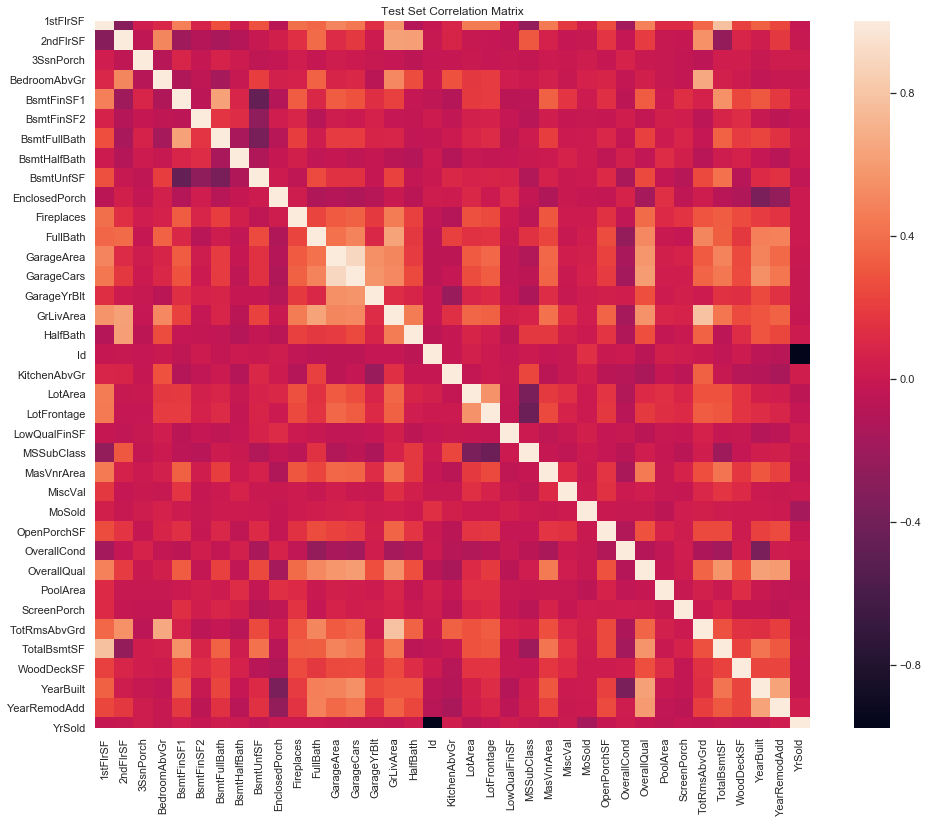

In [23]:
fig, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(test.corr())
plt.title('Test Set Correlation Matrix', y=1.05)
plt.show()

In [24]:
test_cor = test.corr().abs().unstack().sort_values( ascending=False).reset_index()
test_cor.rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation Coefficient'}, inplace=True)
test_cor.drop(test_cor[test_cor['Correlation Coefficient']==1.0].index)

Feature1      Feature2  Correlation Coefficient
37             Id        YrSold                 0.974884
38         YrSold            Id                 0.974884
39     GarageCars    GarageArea                 0.897022
40     GarageArea    GarageCars                 0.897022
41      GrLivArea  TotRmsAbvGrd                 0.788012
...           ...           ...                      ...
1364  ScreenPorch      HalfBath                 0.000446
1365    BsmtUnfSF       MiscVal                 0.000400
1366      MiscVal     BsmtUnfSF                 0.000400
1367  OpenPorchSF        MoSold                 0.000255
1368       MoSold   OpenPorchSF                 0.000255

[1332 rows x 3 columns]

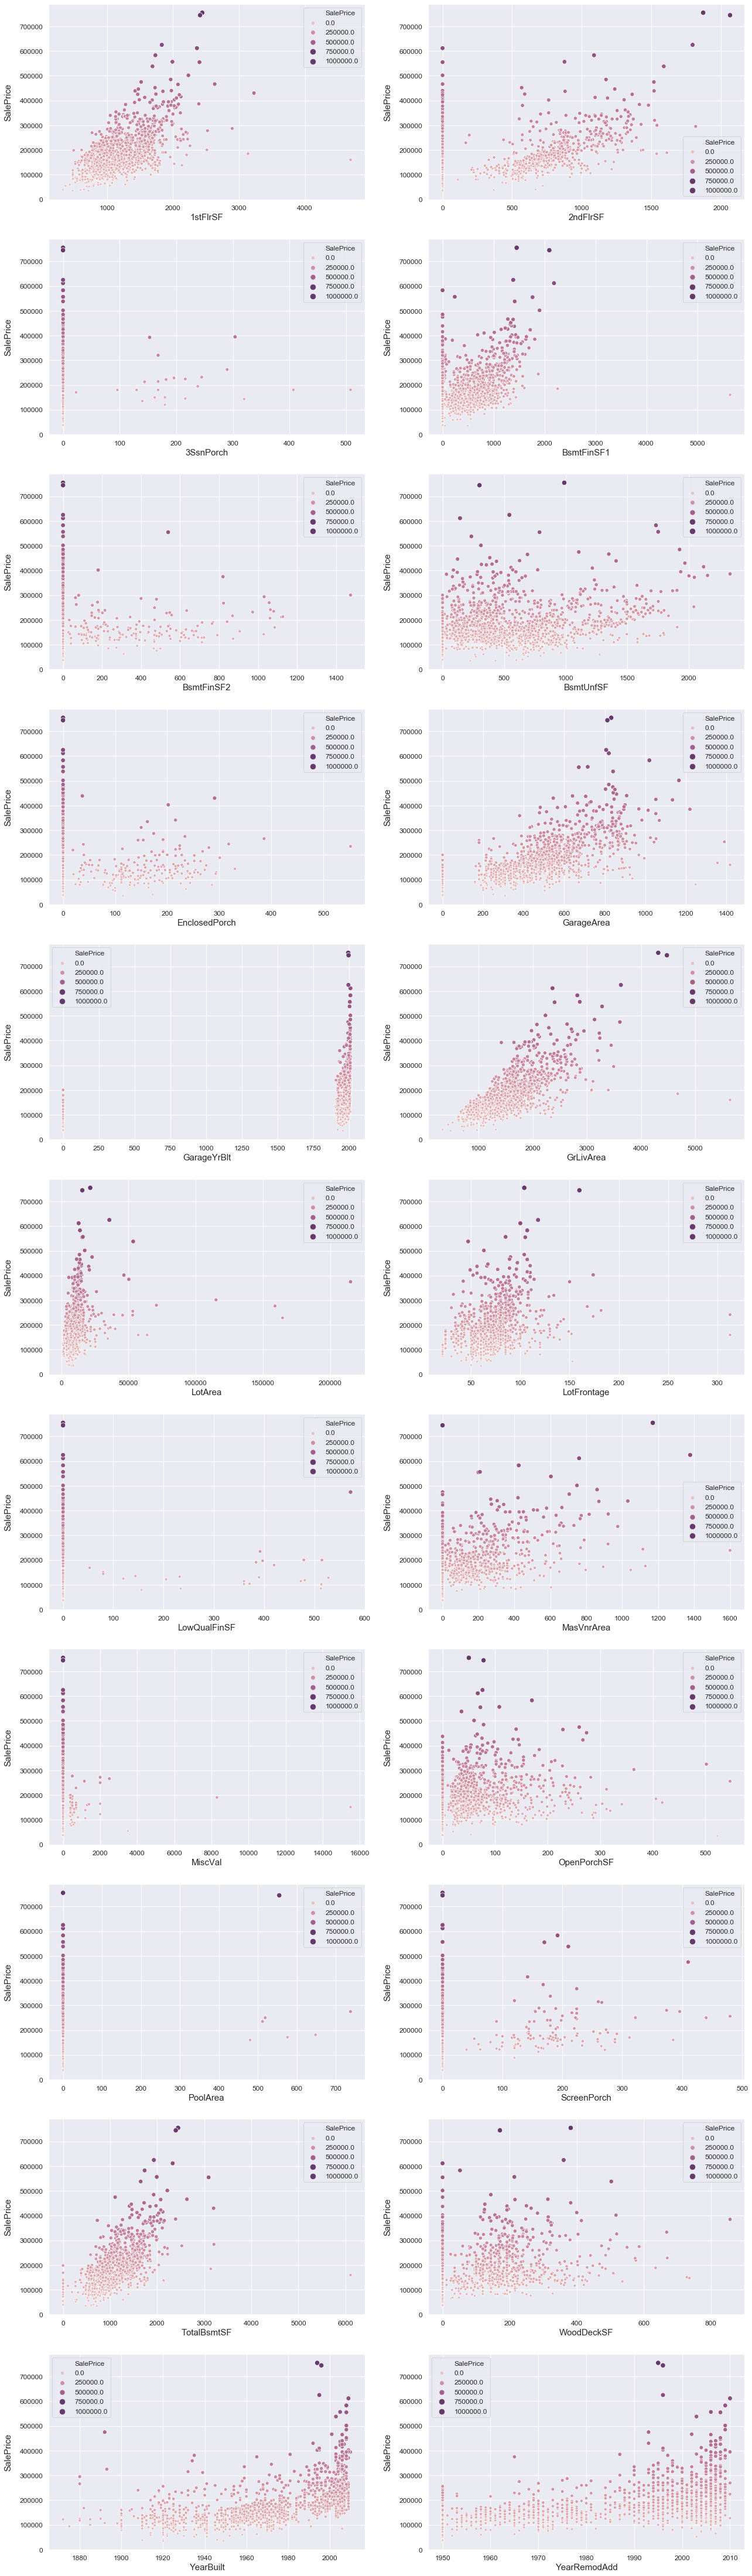

In [25]:
num_features = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 
                'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 
                'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 
                'YearBuilt', 'YearRemodAdd']

fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(12, 80))
plt.subplots_adjust(right=1.5)
cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)

for i, feature in enumerate(num_features, 1):
    plt.subplot(11, 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', size='SalePrice', palette=cmap, data=train)
    
    plt.xlabel('{}' .format(feature), size=15)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size':12})
    
plt.show()

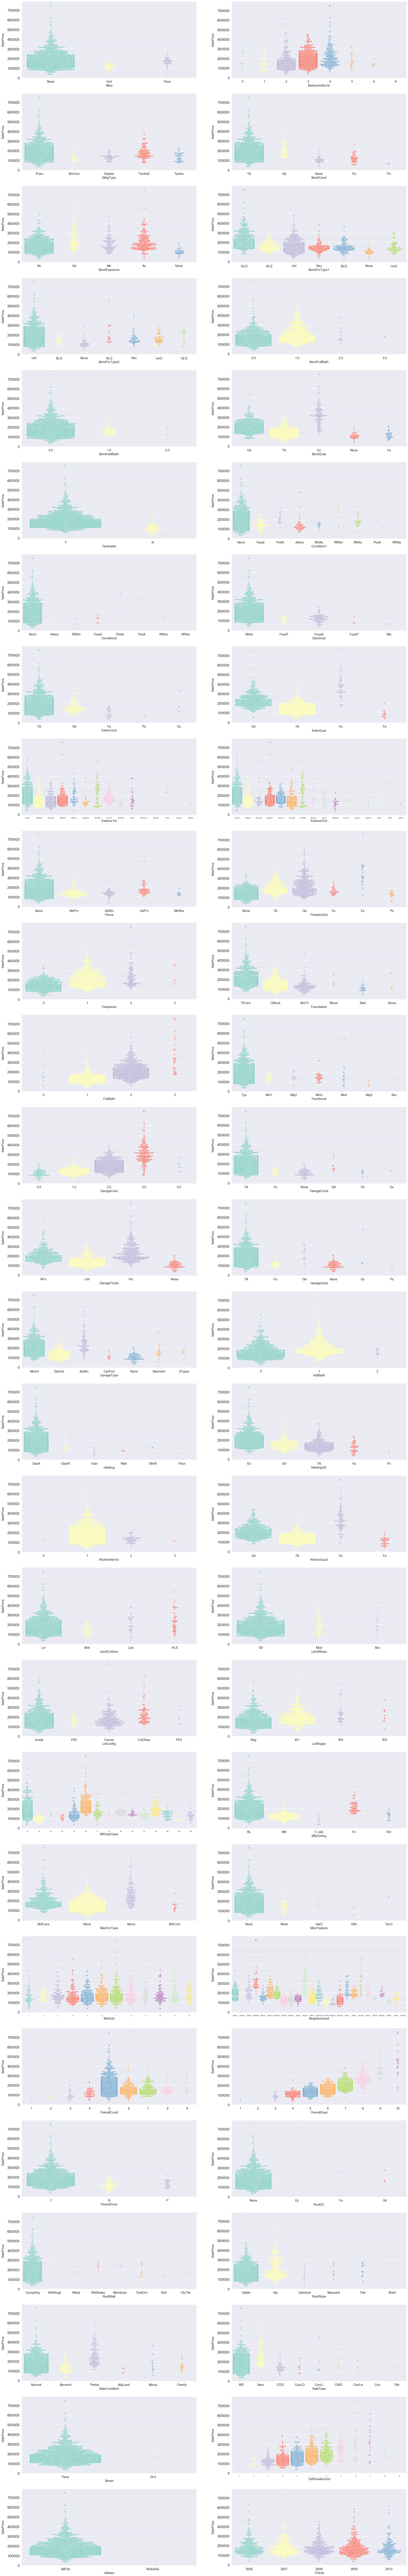

In [32]:
cat_features = ['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 
                'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 
                'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 
                'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'HalfBath', 
                'Heating', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 
                'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 
                'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 
                'OverallQual', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 
                'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities', 'YrSold']

fig, axs = plt.subplots(ncols=2, nrows=28, figsize=(18, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(28, 2, i)
    # sns.catplot(x=feature, y='SalePrice', hue='SalePrice', kind='swarm', data=train)
    sns.swarmplot(x=feature, y='SalePrice', data=train, palette='Set3')
    
    plt.xlabel('{}' .format(feature), size=15)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        if train[feature].value_counts().shape[0] > 10:
            plt.tick_params(axis='x', labelsize=7)
        else:
            plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=17)
    
plt.show()

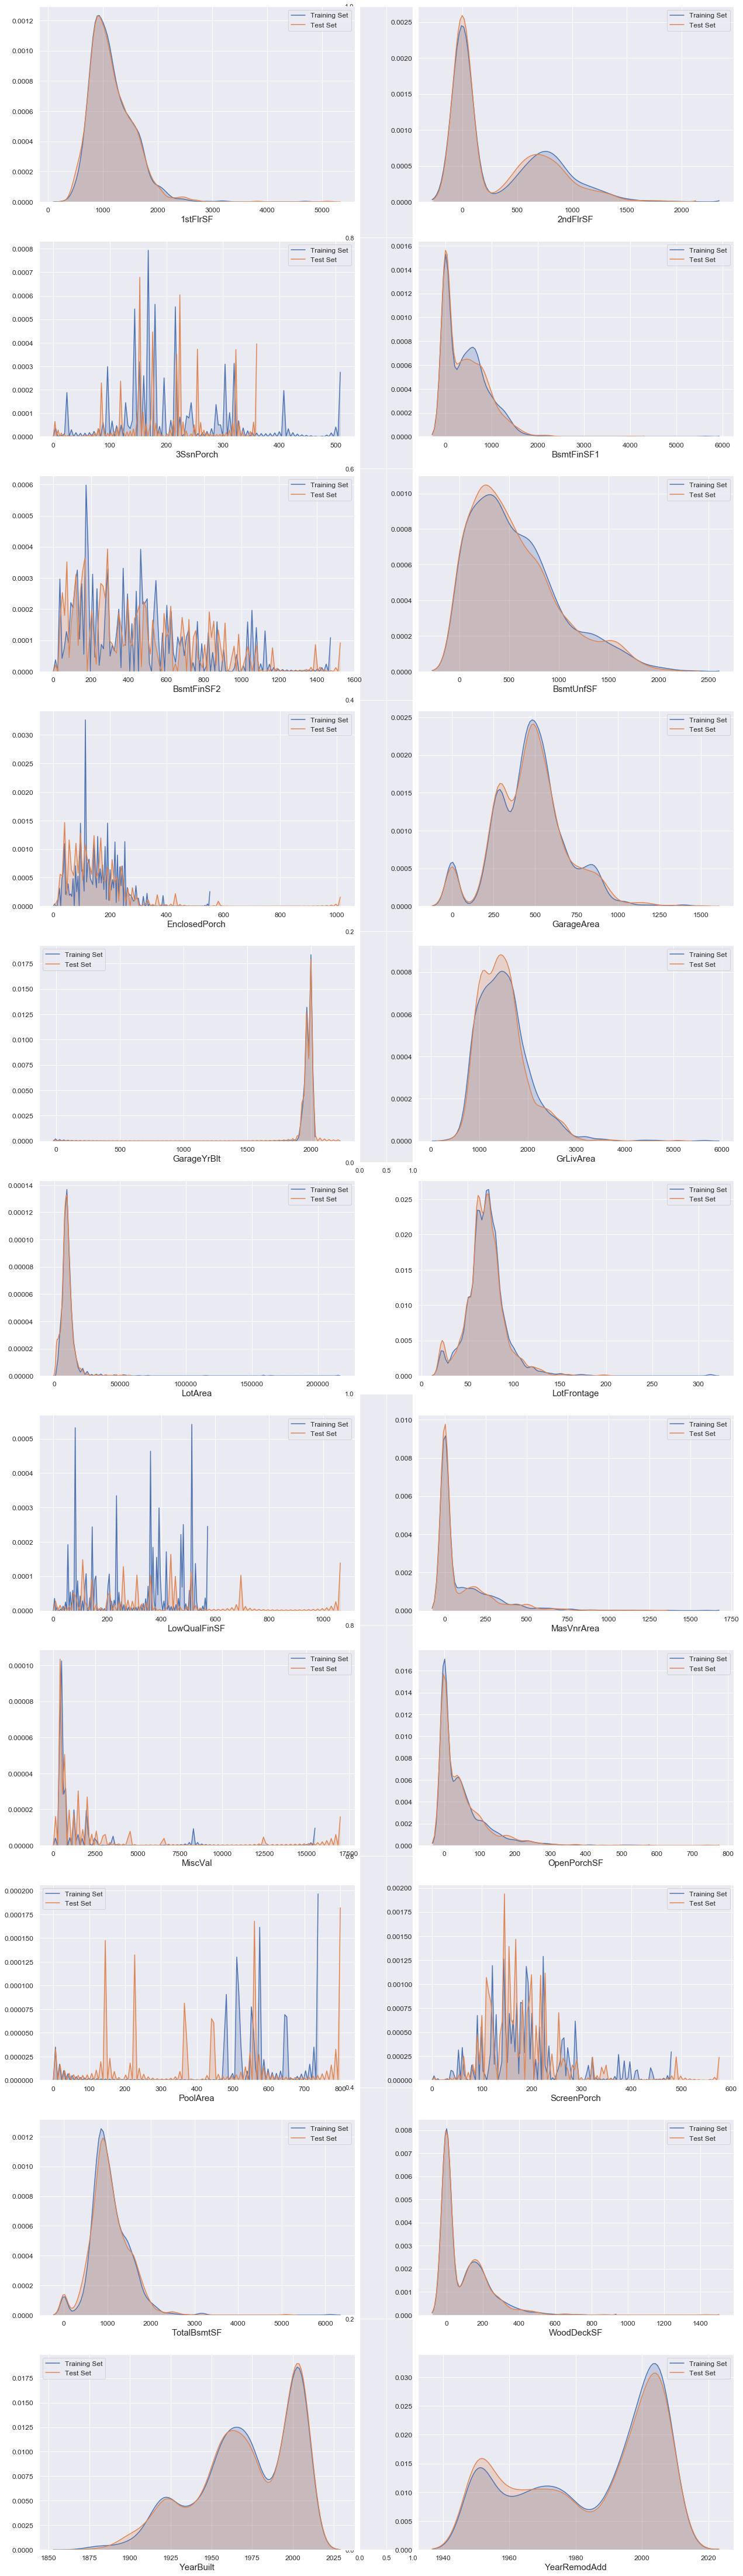

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=11, figsize=(12, 80))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(num_features, 1):
    plt.subplot(11, 2, i)
    sns.kdeplot(train[feature], bw='silverman', label='Training Set', shade=True)
    sns.kdeplot(test[feature], bw='silverman', label='Test Set', shade=True)
    
    plt.xlabel('{}' .format(feature), size=15)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size':12})
    
plt.show()

In [27]:
data_all['YearBuiltRemod'] = data_all['YearBuilt'] + data_all['YearRemodAdd']
data_all['TotalSF'] = data_all['TotalBsmtSF'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']
data_all['TotalSquareFootage'] = data_all['BsmtFinSF1'] + data_all['BsmtFinSF2'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']
data_all['TotalBath'] = data_all['FullBath'] + (0.5 * data_all['HalfBath']) + data_all['BsmtFullBath'] + (0.5 * data_all['BsmtHalfBath'])
data_all['TotalPorchSF'] = data_all['OpenPorchSF'] + data_all['3SsnPorch'] + data_all['EnclosedPorch'] + data_all['ScreenPorch'] + data_all['WoodDeckSF']
data_all['OverallRating'] = data_all['OverallQual'] + data_all['OverallCond']
data_all['HasPool'] = data_all['PoolArea'].apply(lambda x: 1 if x>0 else 0)
data_all['Has2ndFlr'] = data_all['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
data_all['HasGarage'] = data_all['GarageArea'].apply(lambda x: 1 if x>0 else 0)
data_all['HasBsmt'] = data_all['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
data_all['HasFireplace'] = data_all['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

data_all['NewHouse'] = 0
idx = data_all[data_all['YrSold'] == data_all['YearBuilt']].index
data_all.loc[idx, 'NewHouse'] = 1

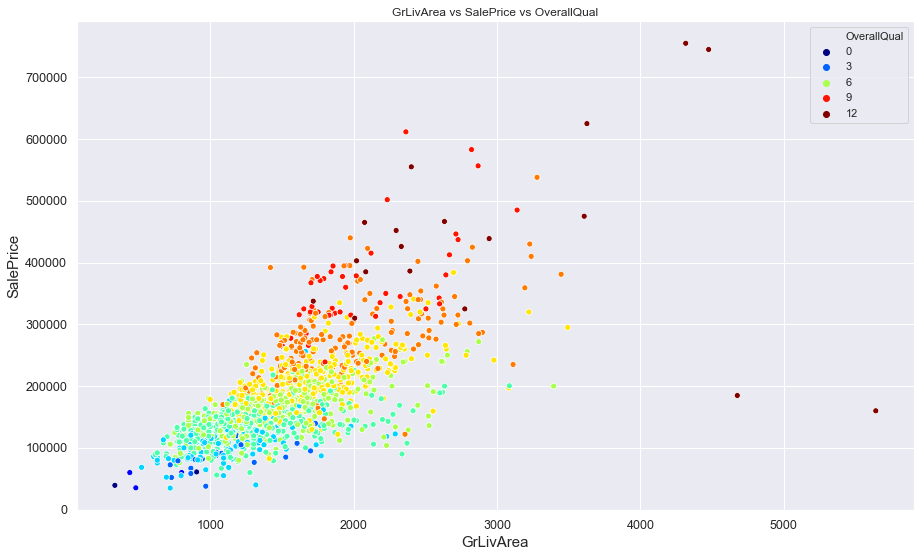

In [28]:
fig = plt.subplots(figsize=(15, 9))
cmap = plt.get_cmap('jet')
#cmap = sns.color_palatte('Set1', n_colors=10)

sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', palette=cmap, data=train)

plt.xlabel('GrLivArea', size=15)
plt.ylabel('SalePrice', size=15)

plt.tick_params(axis='x', labelsize=12.5)
plt.tick_params(axis='y', labelsize=12.6)

plt.title('GrLivArea vs SalePrice vs OverallQual')

plt.show()

In [31]:
data_all.drop(data_all[np.logical_and(data_all['OverallQual'] < 5, data_all['SalePrice'] > 200000)].index, inplace=True)
data_all.drop(data_all[np.logical_and(data_all['GrLivArea']> 4000, data_all['SalePrice'] < 200000)].index, inplace=True)
data_all.reset_index(drop=True, inplace=True)

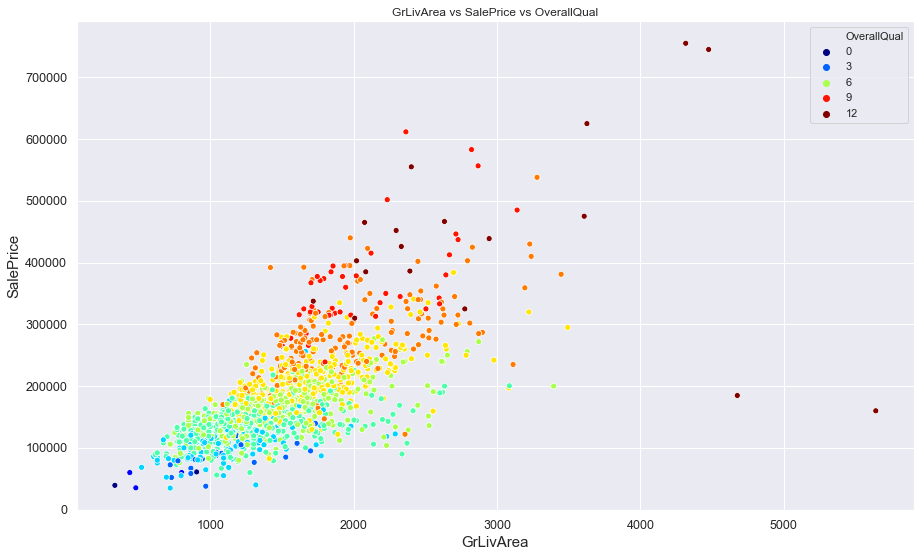

In [32]:
fig = plt.subplots(figsize=(15, 9))
cmap = plt.get_cmap('jet')
#cmap = sns.color_palatte('Set1', n_colors=10)

sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', palette=cmap, data=train)

plt.xlabel('GrLivArea', size=15)
plt.ylabel('SalePrice', size=15)

plt.tick_params(axis='x', labelsize=12.5)
plt.tick_params(axis='y', labelsize=12.6)

plt.title('GrLivArea vs SalePrice vs OverallQual')

plt.show()

In [33]:
bsmtcond_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4}
bsmtexposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
bsmtfintype_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
bsmtqual_map = {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
centralair_map = {'Y': 1, 'N': 0}
extercond_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
exterqual_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
fireplacequ_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
functional_map = {'Typ': 0, 'Min1': 1, 'Min2': 1, 'Mod': 2, 'Maj1': 3, 'Maj2': 3, 'Sev': 4}
garagecond_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
garagefinish_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
garagequal_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
heatingqc_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
kitchenqual_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
landslope_map = {'Gtl': 1, 'Mod': 2, 'Sev': 3}
lotshape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
paveddrive_map = {'N': 0, 'P': 1, 'Y': 2}

data_all['BsmtCond'] = data_all['BsmtCond'].map(bsmtcond_map)
data_all['BsmtExposure'] = data_all['BsmtExposure'].map(bsmtexposure_map)
data_all['BsmtFinType1'] = data_all['BsmtFinType1'].map(bsmtfintype_map)
data_all['BsmtFinType2'] = data_all['BsmtFinType2'].map(bsmtfintype_map)
data_all['BsmtQual'] = data_all['BsmtQual'].map(bsmtqual_map)
data_all['CentralAir'] = data_all['CentralAir'].map(centralair_map)
data_all['ExterCond'] = data_all['ExterCond'].map(extercond_map)
data_all['ExterQual'] = data_all['ExterQual'].map(exterqual_map)
data_all['FireplaceQu'] = data_all['FireplaceQu'].map(fireplacequ_map)
data_all['Functional'] = data_all['Functional'].map(functional_map)
data_all['GarageCond'] =data_all['GarageCond'].map(garagecond_map)
data_all['GarageFinish'] = data_all['GarageFinish'].map(garagefinish_map)
data_all['GarageQual'] = data_all['GarageQual'].map(garagequal_map)
data_all['HeatingQC'] = data_all['HeatingQC'].map(heatingqc_map)
data_all['KitchenQual'] = data_all['KitchenQual'].map(kitchenqual_map)
data_all['LandSlope'] = data_all['LandSlope'].map(landslope_map)
data_all['LotShape'] = data_all['LotShape'].map(lotshape_map)
data_all['PavedDrive'] = data_all['PavedDrive'].map(paveddrive_map)

data_all.drop(columns=['Street', 'Utilities', 'PoolQC'], inplace=True)

In [34]:
nominal_features = ['Alley', 'BldgType', 'Condition1', 'Condition2', 'Electrical', 
                    'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'GarageType', 
                    'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSSubClass',
                    'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood',
                    'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'YrSold']

encoded_features = []
for feature in nominal_features:
    encoded_df = pd.get_dummies(data_all[feature])
    n = data_all[feature].nunique()
    #print(n)
    encoded_df.columns = ['{}, {}' .format(feature, col) for col in encoded_df.columns]
    #print(encoded_df.columns)
    encoded_features.append(encoded_df)
    #print(encoded_df)
    
data_all = pd.concat([data_all, *encoded_features], axis=1)
data_all.drop(columns=nominal_features, inplace=True)

In [35]:
data_all

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0          856       854          0             3         3             1   
1         1262         0          0             3         3             4   
2          920       866          0             3         3             2   
3          961       756          0             3         4             1   
4         1145      1053          0             4         3             3   
...        ...       ...        ...           ...       ...           ...   
2911       546       546          0             3         3             1   
2912       546       546          0             3         3             1   
2913      1224         0          0             4         3             1   
2914       970         0          0             3         3             3   
2915       996      1004          0             3         3             3   

      BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2  BsmtFullBath  \
0          706.0         0.0             6             1           1.0   
1          978.0         0.0             5             1           0.0   
2          486.0         0.0             6             1           1.0   
3          216.0         0.0             5             1           1.0   
4          655.0         0.0             6             1           1.0   
...          ...         ...           ...           ...           ...   
2911         0.0         0.0             1             1           0.0   
2912       252.0         0.0             3             1           0.0   
2913      1224.0         0.0             5             1           1.0   
2914       337.0         0.0             6             1           0.0   
2915       758.0         0.0             2             1           0.0   

      BsmtHalfBath  BsmtQual  BsmtUnfSF  CentralAir  EnclosedPorch  ExterCond  \
0              0.0         3      150.0           1              0          3   
1              1.0         3      284.0           1              0          3   
2              0.0         3      434.0           1              0          3   
3              0.0         2      540.0           1            272          3   
4              0.0         3      490.0           1              0          3   
...            ...       ...        ...         ...            ...        ...   
2911           0.0         2      546.0           1              0          3   
2912           0.0         2      294.0           1              0          3   
2913           0.0         2        0.0           1              0          3   
2914           1.0         3      575.0           1              0          3   
2915           0.0         3      238.0           1              0          3   

      ExterQual  FireplaceQu  Fireplaces  FullBath  Functional  GarageArea  \
0             3            0           0         2           0       548.0   
1             2            3           1         2           0       460.0   
2             3            3           1         2           0       608.0   
3             2            4           1         1           0       642.0   
4             3            3           1         2           0       836.0   
...         ...          ...         ...       ...         ...         ...   
2911          2            0           0         1           0         0.0   
2912          2            0           0         1           0       286.0   
2913          2            3           1         1           0       576.0   
2914          2            0           0         1           0         0.0   
2915          2            3           1         2           0       650.0   

      GarageCars  GarageCond  GarageFinish  GarageQual  GarageYrBlt  \
0            2.0           3             2           3       2003.0   
1            2.0           3             2           3       1976.0   
2            2.0           3             2           3       2001.0  

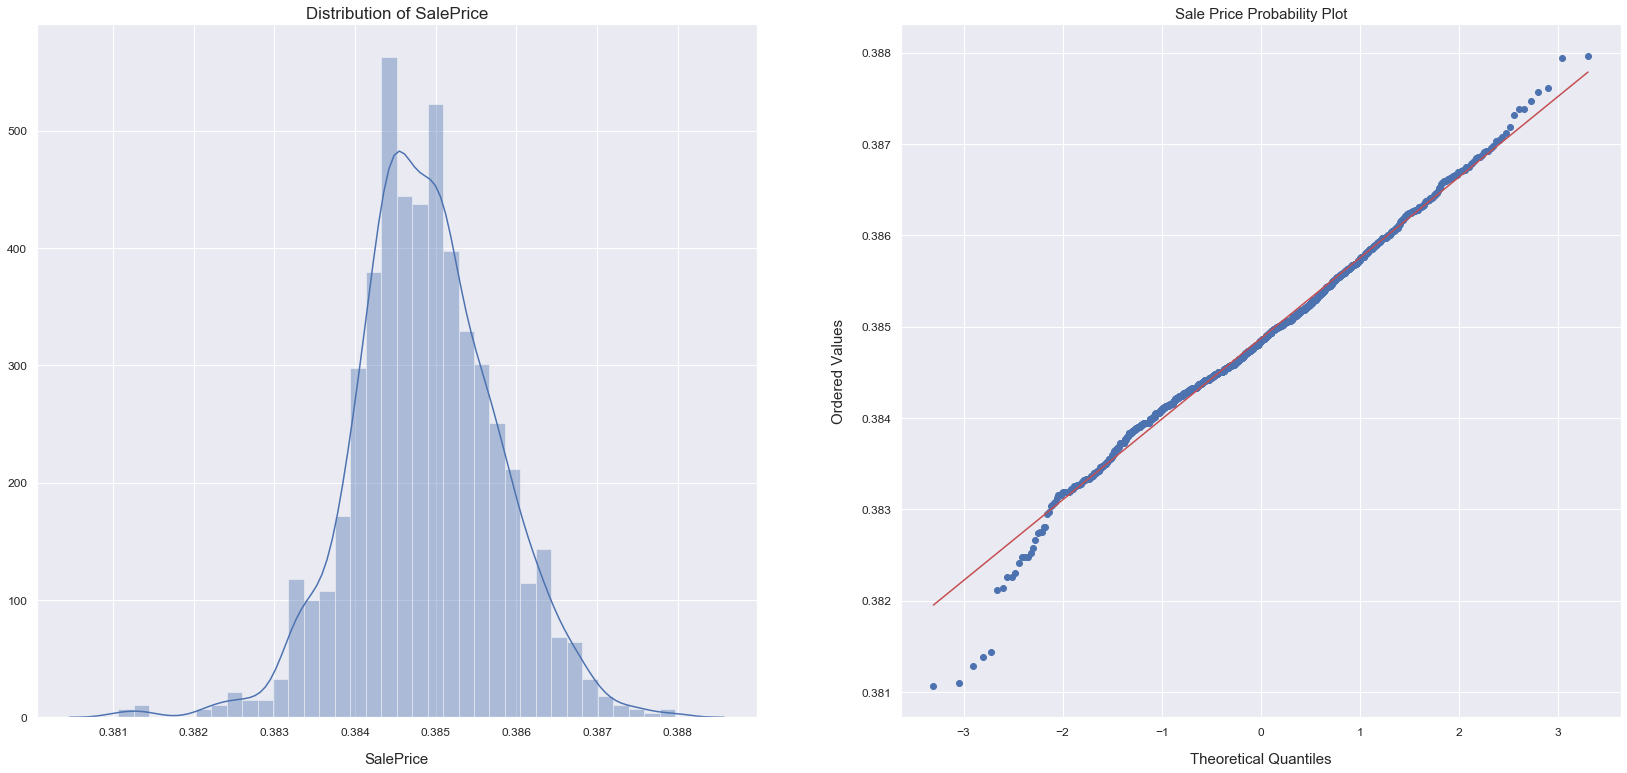

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
plt.subplots_adjust(top=1.5, right=1.5)

sns.distplot(data_all['SalePrice'].dropna(), hist=True, ax=axs[0])
probplot(data_all['SalePrice'].dropna(), plot=axs[1])

axs[0].set_xlabel('SalePrice', size=15, labelpad=15)

axs[1].set_xlabel('Theoretical Quantiles', size=15, labelpad=15)
axs[1].set_ylabel('Ordered Values', size=15, labelpad=15)


for i in range(2):
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

axs[0].set_title('Distribution of SalePrice', size=17)
axs[1].set_title('Sale Price Probability Plot', size=15)

plt.show()

Text(0.5, 1.0, 'Sale Price Probability Plot')

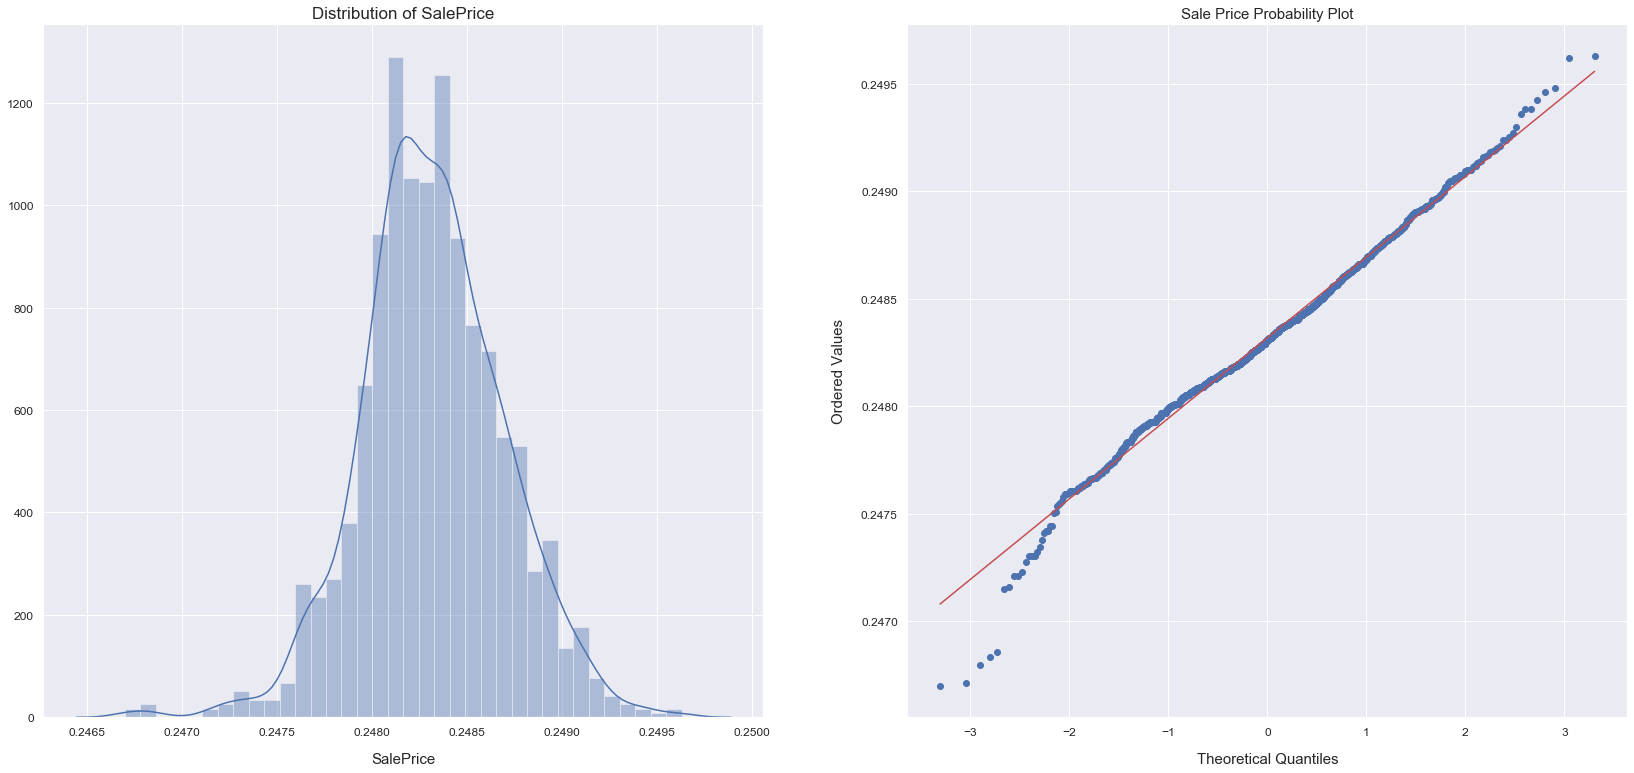

In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
plt.subplots_adjust(top=1.5, right=1.5)

data_all['SalePrice'] = np.log1p(data_all['SalePrice'])

sns.distplot(data_all['SalePrice'].dropna(), hist=True, ax=axs[0])
probplot(data_all['SalePrice'].dropna(), plot=axs[1])

axs[0].set_xlabel('SalePrice', size=15, labelpad=15)
axs[1].set_xlabel('Theoretical Quantiles', size=15, labelpad=15)
axs[1].set_ylabel('Ordered Values', size=15, labelpad=15)

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

axs[0].set_title('Distribution of SalePrice', size=17)
axs[1].set_title('Sale Price Probability Plot', size=15)

In [59]:
data_all['SalePrice'].skew()

-0.08696150979521787

In [60]:
data_all['SalePrice'].kurt()

0.9673226885692534